<a href="https://colab.research.google.com/github/YvixMiHo/TensorFlow_Developer_Skills/blob/main/Data_Augmentation_TensorFlow_LearningObjectives_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Depenedencies

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, losses
from shutil import copyfile
import matplotlib.pyplot as plt

# 2. Load Enviornment / Data set

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-26 12:19:09--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.205.15, 2600:1407:3c00:108c::e59, 2600:1407:3c00:10a2::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.35.205.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   113MB/s    in 7.2s    

2022-06-26 12:19:16 (110 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



## 2.a Make sense of the data, use confusion matrix if necessary

In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [4]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  base_dir            = root_dir
  train_dir           = os.path.join(base_dir, "training")
  validation_dir      = os.path.join(base_dir, "validation")
  #
  train_cats_dir      = os.path.join(train_dir, "cats")
  train_dogs_dir      = os.path.join(train_dir, "dogs")

  validation_cats_dir = os.path.join(validation_dir, "cats")
  validation_dogs_dir = os.path.join(validation_dir, "dogs")

  os.makedirs(train_dir)
  os.makedirs(validation_dir)
  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)
  os.makedirs(validation_cats_dir)
  os.makedirs(validation_dogs_dir)
  pass
  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats


## 2.b Validate data shape*

In [6]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  ### START CODE HERE
  file_storage = []
  for filename in os.listdir(SOURCE_DIR):
    file_target = SOURCE_DIR + filename
    if(os.path.getsize(file_target)>0):
      file_storage.append(filename)
    else:
      print(filename + "is zero length, so ignoring")
  
  random_set = random.sample(file_storage,len(file_storage)) 

  train_data = random_set[:int(SPLIT_SIZE*len(file_storage))]
  test_data = random_set[int(SPLIT_SIZE*len(file_storage)):]

  #take each file from traindata and validation data and
  for filename in train_data:
    copyfile(SOURCE_DIR+filename,TRAINING_DIR+filename)
  for filename in test_data:
    copyfile(SOURCE_DIR+filename,VALIDATION_DIR+filename)

  pass

In [7]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpgis zero length, so ignoring
11702.jpgis zero length, so ignoring


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


## 2.c Visualize the data

## 2.d* preprocess data

## 2.e* use data augmentation and dropout

In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=250,
                                                      class_mode="binary",
                                                      target_size=(150,150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=250,
                                                                class_mode="binary",
                                                                target_size=(150,150))
  return train_generator, validation_generator

In [9]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# 3. Create, Train and Fit model

In [10]:
def create_model():
  model = tf.keras.models.Sequential([ 
        # 1
        tf.keras.layers.Conv2D(32, (3,3), activation ="relu", input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        # 2
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        # 3
        tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        # 4
        tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
        tf.keras.layers.Conv2D(2,2),
        # 5
        #tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
        #tf.keras.layers.Conv2D(2,2),
        #flat
        tf.keras.layers.Flatten(),
        # 512 
        tf.keras.layers.Dense(512, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid"),
  ])

  
  model.compile(loss=losses.BinaryCrossentropy(),
                  optimizer=optimizers.Adam(lr = 0.001),
                  metrics=['accuracy']) 
    
  return model

In [11]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
66/90 [=====================>........] - ETA: 43s - loss: 0.6770 - accuracy: 0.5708

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

90/90 [==============================] - 195s 2s/step - loss: 0.6688 - accuracy: 0.5834 - val_loss: 0.6254 - val_accuracy: 0.6424
Epoch 2/15
90/90 [==============================] - 178s 2s/step - loss: 0.6106 - accuracy: 0.6583 - val_loss: 0.5768 - val_accuracy: 0.6964
Epoch 3/15
90/90 [==============================] - 175s 2s/step - loss: 0.5715 - accuracy: 0.6965 - val_loss: 0.5519 - val_accuracy: 0.7068
Epoch 4/15
90/90 [==============================] - 175s 2s/step - loss: 0.5525 - accuracy: 0.7170 - val_loss: 0.5448 - val_accuracy: 0.7152
Epoch 5/15
90/90 [==============================] - 172s 2s/step - loss: 0.5270 - accuracy: 0.7383 - val_loss: 0.5166 - val_accuracy: 0.7368
Epoch 6/15
90/90 [==============================] - 172s 2s/step - loss: 0.5031 - accuracy: 0.7514 - val_loss: 0.4946 - val_accuracy: 0.7616
Epoch 7/15
90/90 [==============================] - 172s 2s/step - loss: 0.4885 - accuracy: 0.7638 - val_loss: 0.4895 - val_accuracy: 0.7488
Epoch 8/15
90/90 [======

## 3.a* use (pre-trained model)transfer learning if necessary

## 3.b* extract features of pre-trained model

## 3.c* match test data to inputshape of neural network

## 3.d* match output data of a neural network to speicifed inputshape for test data

## 3.e* use batch loading of data

## 3.f* use callbacks to trigger the end of training cycles

# 4. Evaluate the model

## 4.a Visualize the model

## 4.b* Plot loss and accuracy of a trained model

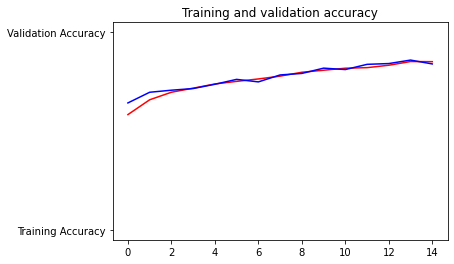

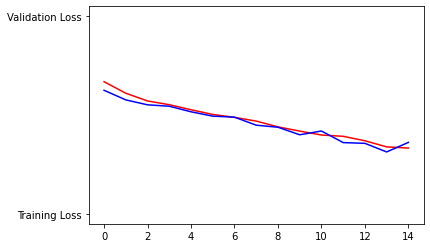

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

## 4.c* use model to predict results